In [ ]:
# https://stackoverflow.com/questions/48180041/how-can-i-use-multiple-dimensional-polynomials-with-numpy-polynomial

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np


array([-2.15288272e-02,  4.14912575e-01, -2.04530213e+00,  4.51675005e+00,
       -2.56909308e+00,  5.56836426e+00,  5.62367615e-01,  2.79285840e+01,
       -6.85718878e+01,  4.18912234e+01, -2.96175265e+00, -6.31030974e+00,
       -1.01691093e+02,  2.69506241e+02, -1.71629382e+02, -1.97242664e+01,
        1.92812690e+01,  1.24271551e+02, -3.76942603e+02,  2.51909474e+02,
        1.65734428e+01, -1.55617365e+01, -4.46410788e+01,  1.70197391e+02,
       -1.20770542e+02])

In [85]:
import numpy as np
x = np.random.random((100, 2))
y = np.sin(5 * x[:,0]) + .4 * np.sin(x[:,1])
degrees = [(i, j) for i in range(5) for j in range(5)]  # list of monomials x**i * y**j to use
matrix = np.stack([np.prod(x**d, axis=1) for d in degrees], axis=-1)   # stack monomials like columns
coeff = np.linalg.lstsq(matrix, y)[0]    # lstsq returns some additional info we ignore
print("Coefficients", coeff)    # in the same order as the monomials listed in "degrees"
fit = np.dot(matrix, coeff)

alt_coeffs = np.dot(np.linalg.pinv(matrix), y)
print(coeff - alt_coeffs)



Coefficients [ 5.23057458e-02 -3.71786220e-01  2.94229030e+00 -4.87045221e+00
  2.63626477e+00  4.26698529e+00  1.32066896e+01 -4.13370490e+01
  5.88576475e+01 -2.92934327e+01  3.44719266e+00 -6.49885186e+01
  1.81493500e+02 -2.28894302e+02  1.02225461e+02 -3.03070373e+01
  1.09776434e+02 -2.78227810e+02  3.10450579e+02 -1.21217248e+02
  2.18832681e+01 -5.91839132e+01  1.40854217e+02 -1.41539123e+02
  4.74754398e+01]
[-2.31759056e-15  3.34177130e-14 -1.15463195e-14  3.10862447e-14
  8.88178420e-16  2.30926389e-14 -1.06581410e-13  6.96331881e-13
  3.05533376e-13  4.83169060e-13 -1.15019105e-13  1.56319402e-13
 -2.55795385e-12  7.67386155e-13 -1.83320026e-12  1.17239551e-13
 -1.02318154e-12  2.38742359e-12  4.26325641e-12  2.71427325e-12
  2.84217094e-14  1.06581410e-13 -2.44426701e-12  2.75690581e-12
 -7.46069873e-13]


/Users/spx8sk/anaconda3/envs/wispy-dev/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [86]:
degrees

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]

In [87]:
matrix.shape

(100, 25)

In [88]:
len(degrees)

25

In [89]:
print("Fitted values", fit)

Fitted values [-3.71886548e-01  1.39399489e-01  3.42872600e-01  9.35875958e-01
  1.21952315e+00  1.25255945e+00 -9.13098539e-01  6.65562722e-01
  2.89110116e-01  4.60645710e-01  3.36758723e-01 -7.46500320e-01
  5.43754691e-01 -6.45034416e-01  5.63937210e-01 -3.57024542e-02
 -8.15407578e-01  1.13431497e+00 -2.50527028e-01  1.01576345e+00
 -3.52508216e-02  1.24964047e+00  1.01041082e+00  8.11936389e-01
  8.87190153e-01  3.52526906e-01  1.18405103e+00  7.65871445e-01
  5.27116847e-01 -8.75035675e-02  1.25687289e+00 -7.04799765e-01
 -8.23935762e-01  3.10966189e-01  1.05598268e+00  1.14973555e+00
  3.20268721e-01  3.89992579e-01  1.29485957e+00 -6.32566932e-01
  6.97471117e-02  8.55846214e-01  4.99416717e-01 -5.94360260e-01
  1.10346764e+00 -6.32328412e-01  1.20595919e+00  1.02131671e+00
  1.06468450e+00 -6.86231653e-01  1.71027886e-04  1.86684131e-01
 -5.69567148e-01  4.96259359e-02 -7.02735064e-01 -6.91322842e-01
  2.12356245e-01  9.58261523e-01  1.00033570e+00 -5.20174678e-01
 -4.7772701

In [90]:
print("Original values", y)

Original values [-0.36412876  0.13760067  0.3377002   0.94123771  1.21827801  1.27651737
 -0.88737442  0.6552781   0.28814905  0.46450452  0.34332796 -0.72885787
  0.53089316 -0.65290668  0.56018486 -0.03903483 -0.84407591  1.15043797
 -0.25536863  1.03121273 -0.06166036  1.27320746  1.0156493   0.79954224
  0.86810229  0.35028924  1.19654612  0.77012122  0.51293499 -0.09533757
  1.26309026 -0.68901964 -0.83182935  0.30256804  1.06728033  1.1634595
  0.33082813  0.37600958  1.31931424 -0.64522132  0.04331781  0.85654968
  0.46160446 -0.58450608  1.11976351 -0.62046408  1.19233745  1.03507293
  1.07692795 -0.69126967 -0.02561901  0.16812491 -0.56407944  0.0222838
 -0.68050106 -0.67132156  0.18662565  0.95562862  0.99759411 -0.50308943
 -0.45096621  0.95333474  1.00100915 -0.7977955   0.20001476 -0.67902043
 -0.26684344  0.48450011  0.64832764  0.86325977  0.96317526  1.10991103
  0.77676452  0.82664919  1.22437936  0.27879284  1.04114089  0.08905526
 -0.63843503 -0.99360564  1.07014383 

In [91]:
plt.figure()
plt.scatter(range(len(y)), y)
plt.scatter(range(len(y)), fit)

In [92]:
plt.figure()
plt.scatter(range(len(y)), y-fit)

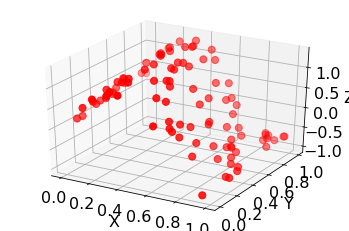

In [93]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(x[:,0], x[:,1], y, c="r", s=50)
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.show()
